This notebook explores collected geospatial data on Alaskan Snow Crabs examining the general recorded abundance of snow crabs from 1975-2018.

The data was collected by the NOAA (National Oceanic and Atmospheric Administration) and can be found at this <a href="https://www.kaggle.com/datasets/mattop/snowcrab">link</a>


In [1]:
import pandas as pd #load data, dataframes
import matplotlib.pyplot as plt #plotting
import numpy as np #quick math
from sklearn.linear_model import LinearRegression #linear regression
from mpl_toolkits.basemap import Basemap #create geographical plots
from ipywidgets import interact, IntSlider #interactive and dynamic plots

In [2]:
#Load Alaskan Snow Crab Data
snow_crabs = pd.read_csv("mfsnowcrab.csv")
#Show snippet of dataset
snow_crabs.head()

,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,cpue
0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356
1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691
2,147036,57.00000,-167.68333,1975,snow crab,male,75,8.8,1.6,139,119748
3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882
4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258


CPUE (Catch per unit of effort) gives a general idea of abundance with higher values indicating a higher general population abundance.

In this dataset, CPUE is the number of crabs caught in a single haul over a certain distance.

I'm interested in first visualizing cpue overtime before diving deeper.

In [3]:
bin_edges = np.histogram_bin_edges(snow_crabs["year"], bins = (np.max(snow_crabs["year"]) - np.min(snow_crabs["year"])) // 5)

In [4]:
group_indices = np.digitize(snow_crabs["year"], bin_edges)

In [5]:
snow_crabs_agg = (snow_crabs[["year", "cpue"]]
       .groupby(group_indices, as_index = False)
       .aggregate(median = ("cpue", np.median),
                  size = ("cpue", np.size)))

In [6]:
snow_crabs_agg

,median,size
0,5603.0,1497
1,2397.0,2161
2,5636.5,2524
3,7567.0,2121
4,1940.5,2298
5,1446.0,2425
6,4234.0,2391
7,2737.0,2120
8,2264.0,390


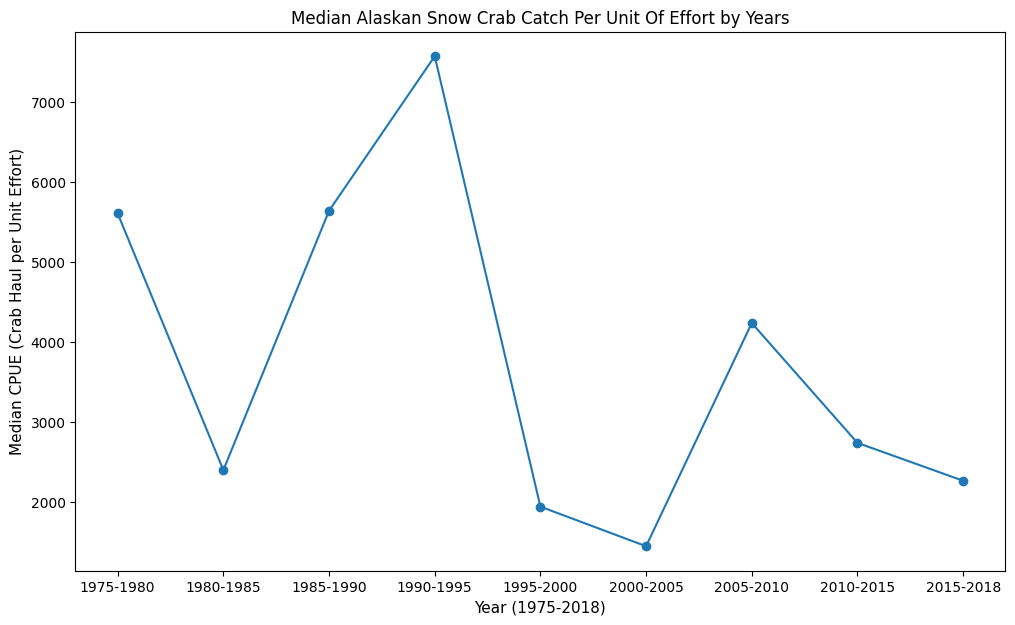

In [7]:
plt.figure(figsize=(12,7))
plt.plot(bin_edges, snow_crabs_agg['median'])
plt.scatter(bin_edges, snow_crabs_agg['median'])
plt.xticks(ticks=bin_edges, labels=['1975-1980','1980-1985','1985-1990','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015','2015-2018']);
plt.title("Median Alaskan Snow Crab Catch Per Unit Of Effort by Years");
plt.xlabel("Year (1975-2018)", fontsize=11)
plt.ylabel("Median CPUE (Crab Haul per Unit Effort)", fontsize=11);

This plot shows that the median catch per unit of effort of recorded snow crab hauls has been decreasing from 2005-2018.

It would be nice to visualize catch per unit of effort on a map, which we can do since we have longitude latitude pairs of each record.

In [11]:
@interact(
    y = IntSlider(value=1978, min=1978, max=2017, step=5, description = "Year")
)
def plot_crabs_longlat(y):
    plt.figure(figsize=(12,12))
    map = Basemap(projection='mill',
            llcrnrlat = 54,
            llcrnrlon = -180,
            urcrnrlat = 66,
            urcrnrlon = -160,
            resolution='l')
    map.drawcoastlines()
    map.drawmeridians(np.arange(-180.0, -160.0, 2.0), labels=[1,0,0,1])
    map.drawparallels(np.arange(54.0, 66.0, 2.0), labels=[1,0,0,1])
    map.scatter(snow_crabs.loc[snow_crabs['year'] == y]['longitude'].values, 
            snow_crabs.loc[snow_crabs['year'] == y]['latitude'].values,
            s=snow_crabs.loc[snow_crabs['year'] == y]['cpue'] / 500,
            latlon=True, #c=snow_crabs.loc[snow_crabs['year'] == y]['bottom_temperature'], cmap='Blues_r'
                 alpha=0.8)
#    map.colorbar().set_label("Average Temperature at Bottom of Ocean ($^\circ$ C)")

interactive(children=(IntSlider(value=1978, description='Year', max=2017, min=1978, step=5), Output()), _dom_c…

This plot draws a projection of the earth centered around the Bering Sea. This plot allows us to see both the locations where crab hauls were recorded each year. Points are sized by catch per unit of effort and larger points demonstrate that more crabs were found per unit of effort in that specific location.

This plot gives a better picture of snow crab density throughout the Bering Sea over time; however, it doesn't describe what might be impacting it.

Lets take a look at bottom temperatures and if there might be some relation between them.

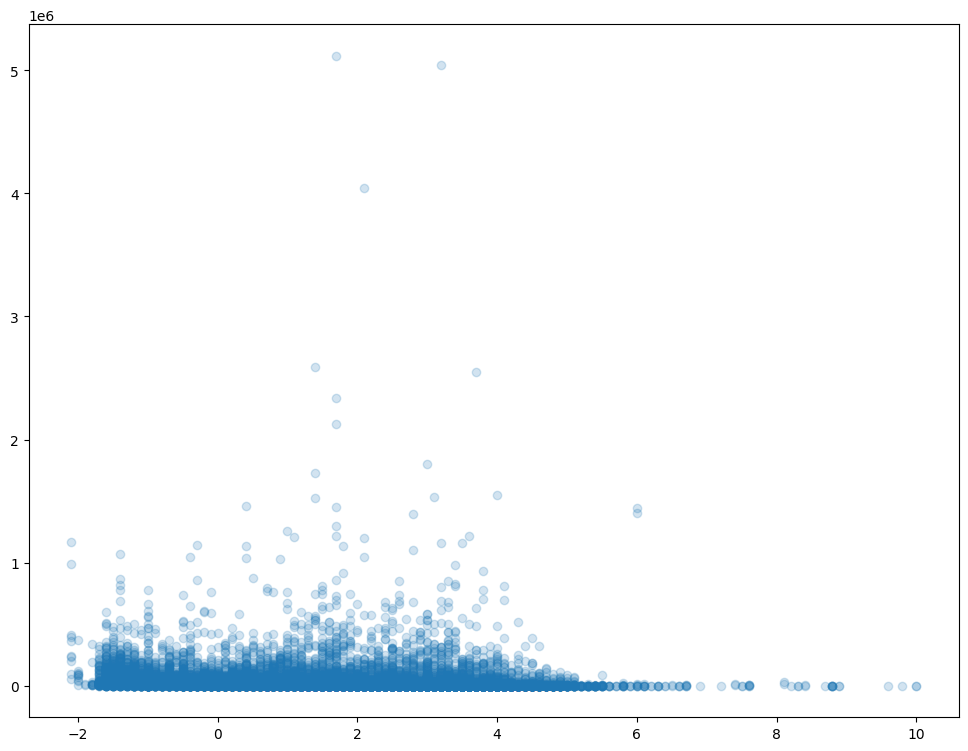

In [15]:
plt.figure(figsize=(12, 9));
plt.scatter(snow_crabs['bottom_temperature'], snow_crabs['cpue'], alpha=0.2);

This graph is promising and shows that the bulk of the data has recorded bottom temperatures between -2 and 5 degrees celsius with cpue values between 0 and 1,000,000. While there are noticable outliers within this range of temperatures with some cpue values surpassing 5,000,000.

Importantly, hauls with temperatures between 5 and 10 degrees celsius have much smaller cpue suggesting that higher temperatures near the ocean floor have an affect on snow crab abundance.

Let's add what we discovered back to our geographical plot.

In [19]:
@interact(
    y = IntSlider(value=1978, min=1978, max=2017, step=5, description = "Year")
)
def plot_crabs_longlat(y):
    plt.figure(figsize=(12,12))
    map = Basemap(projection='mill',
            llcrnrlat = 54,
            llcrnrlon = -180,
            urcrnrlat = 66,
            urcrnrlon = -160,
            resolution='l')
    map.drawcoastlines()
    map.drawmeridians(np.arange(-180.0, -160.0, 2.0), labels=[1,0,0,1])
    map.drawparallels(np.arange(54.0, 66.0, 2.0), labels=[1,0,0,1])
    map.scatter(snow_crabs.loc[snow_crabs['year'] == y]['longitude'].values, 
            snow_crabs.loc[snow_crabs['year'] == y]['latitude'].values,
            s=snow_crabs.loc[snow_crabs['year'] == y]['cpue'] / 500,
            latlon=True, c=snow_crabs.loc[snow_crabs['year'] == y]['bottom_temperature'], cmap='Blues_r',
                 alpha=0.8)
    map.colorbar().set_label("Temperature at Bottom of Ocean ($^\circ$ C)")

interactive(children=(IntSlider(value=1978, description='Year', max=2017, min=1978, step=5), Output()), _dom_c…

I have changed how each point is colored with color now corresponding to the temperature at the bottom of the ocean at each recorded value. From this the plot has now become much more useful at visualizing snow crab abundance, its position on a map, and the bottom temperature recorded.

From this we can visualize that much larger and more frequent clusters of snow crabs were recorded in areas with colder ocean floor temperatures.
This also shows that higher catch per unit of effort of crab hauls are found above 58 degrees north.

To support my observations, it might be useful to use multiple linear regression to see if this reasoning follows.

In [9]:
@interact(
    y = IntSlider(value=1978, min=1978, max=2017, step=5, description = "Year")
)
def plot_crabs_longlat(y):
    plt.figure(figsize=(12, 9))
    plt.scatter(snow_crabs.loc[snow_crabs['year'] == y]['longitude'], 
                snow_crabs.loc[snow_crabs['year'] == y]['latitude'], 
                s=snow_crabs.loc[snow_crabs['year'] == y]["cpue"] / 500,
                c=snow_crabs.loc[snow_crabs['year'] == y]["bottom_temperature"],
                cmap=plt.get_cmap("Blues_r"),alpha=0.8, label="Catch Per Unit of Effort")
    plt.colorbar().set_label("Average Temperature at Bottom of Ocean ($^\circ$ C)")
    plt.legend()
    plt.xlabel("Longitude at Haul Position")
    plt.ylabel("Latitude at Haul Position")
    plt.show()

interactive(children=(IntSlider(value=1978, description='Year', max=2017, min=1978, step=5), Output()), _dom_c…

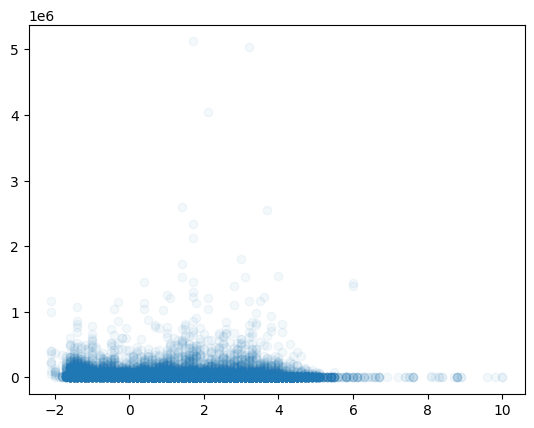

In [27]:
plt.scatter(snow_crabs['bottom_temperature'], snow_crabs['cpue'], alpha = 0.05);

In [11]:
N = np.shape(snow_crabs)[0]
Xdf = snow_crabs.iloc[:, [1,2,3,6,7,8,9]]
X = Xdf.to_numpy()
y = snow_crabs.loc[:, "cpue"]

In [12]:
fit = LinearRegression().fit(X, y)

In [13]:
fit.coef_

array([ 6502.83180558,  1821.62900916,  -598.09229448,  -351.71696877,
        4849.93768259, -3750.33827346,   257.07968168])

In [48]:
fit.intercept_

NameError: name 'fit' is not defined

By using multiple linear regression we can see that latitude and bottom_temperature tend to have the greatest affect on CPUE with a higher latitude increasing
the CPUE of a particular haul and a higher bottom_temperature lowering the CPUE.

This is reflected in the plots above as hauls further north have lower bottom temperatures and much larger clusters.

In [15]:
mdns = snow_crabs[['latitude', 'longitude', 'year', 'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul']].aggregate(np.median)
mdns

latitude                 58.34467
longitude              -170.85025
year                   1998.00000
bottom_depth             84.00000
surface_temperature       7.30000
bottom_temperature        2.00000
haul                    127.00000
dtype: float64

In [16]:
fit.predict([[62, -170.8, 1988, 84, 7.3, 10, 123.8]])

array([33262.50368508])

In [31]:
snow_crabs.sex = snow_crabs.sex.map(dict(male=1, female=0))

In [47]:
@interact(
    y = IntSlider(value=1978, min=1978, max=2017, step=5, description = "Year")
)
def plot_crabs_longlat(y):
    plt.figure(figsize=(12,12))
    map = Basemap(projection='mill',
            llcrnrlat = 54,
            llcrnrlon = -180,
            urcrnrlat = 66,
            urcrnrlon = -160,
            resolution='l')
    map.drawcoastlines()
    map.drawmeridians(np.arange(-180.0, -160.0, 2.0), labels=[1,0,0,1])
    map.drawparallels(np.arange(54.0, 66.0, 2.0), labels=[1,0,0,1])
    map.scatter(snow_crabs.loc[snow_crabs['year'] == y]['longitude'].values, 
            snow_crabs.loc[snow_crabs['year'] == y]['latitude'].values
            latlon=True, c=snow_crabs.loc[snow_crabs['year'] == y]['bottom_depth'], cmap=plt.get_cmap('Blues'))

interactive(children=(IntSlider(value=1978, description='Year', max=2017, min=1978, step=5), Output()), _dom_c…